# Exercise Set 7

## Electrostatic Potentials

This problem is the follow-up to the electrostatic potential case we analyzed in calss. The tope edge of a plate is kept at $100 \; \mathrm{V}$ potential, and the other 3 edges are kept at $0 \; \mathrm{V}$.

### Part a

Calculate the electrostatic potential everywhere on the square plate, as we did in calss, but using 1000 iterations.

<IPython.core.display.Javascript object>


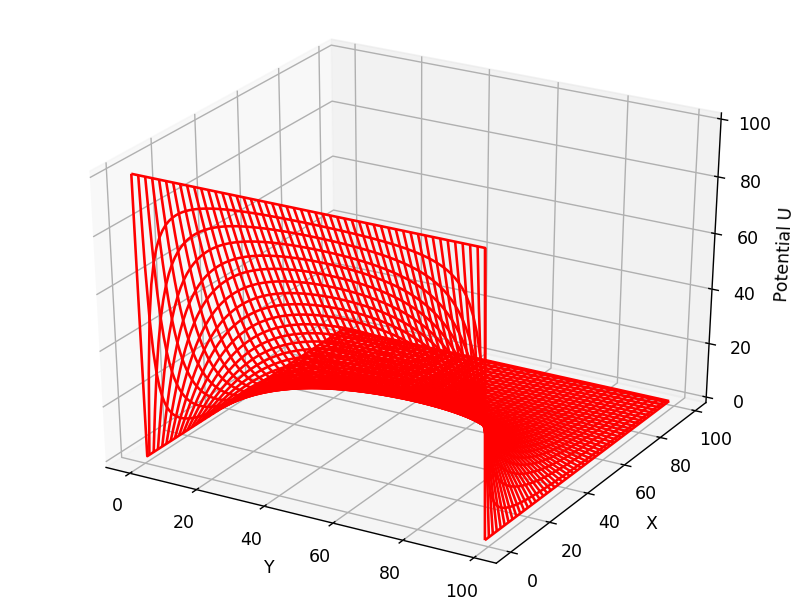

In [19]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 1000
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

<IPython.core.display.Javascript object>


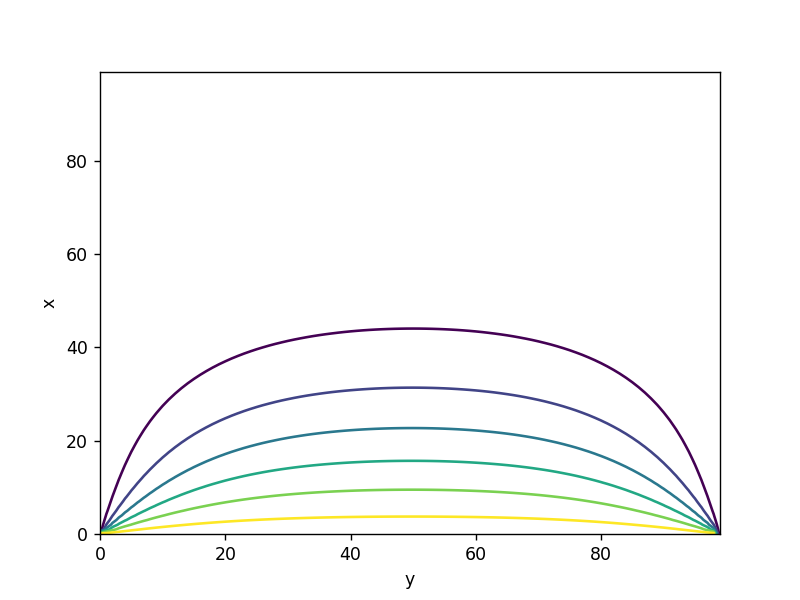

In [10]:
#%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
Niter = 1000
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
plt.contour(X, Y, Z)
plt.xlabel('y')
plt.ylabel('x')

plt.show() 

### Part b:

Repeat the process for different step sizes $h$ and draw conclusions abou the stability and accuracy of the solution.

Note that increasing the size of the grid over which voltage values are evaluated is the same as decreasing the size of $h$ (thus increasing the resolution of the solution). Let's try doubling the resolution (halfing $h$)!

<IPython.core.display.Javascript object>


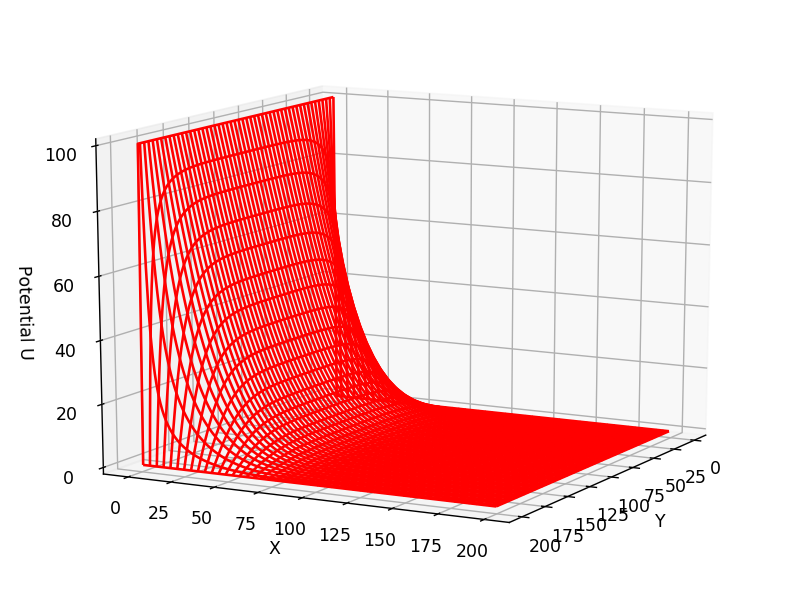

In [16]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 200 #DOUBLE THE RESOLUTION
Niter = 1000
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

What about halfing the resolution (doubling $h$)?

<IPython.core.display.Javascript object>


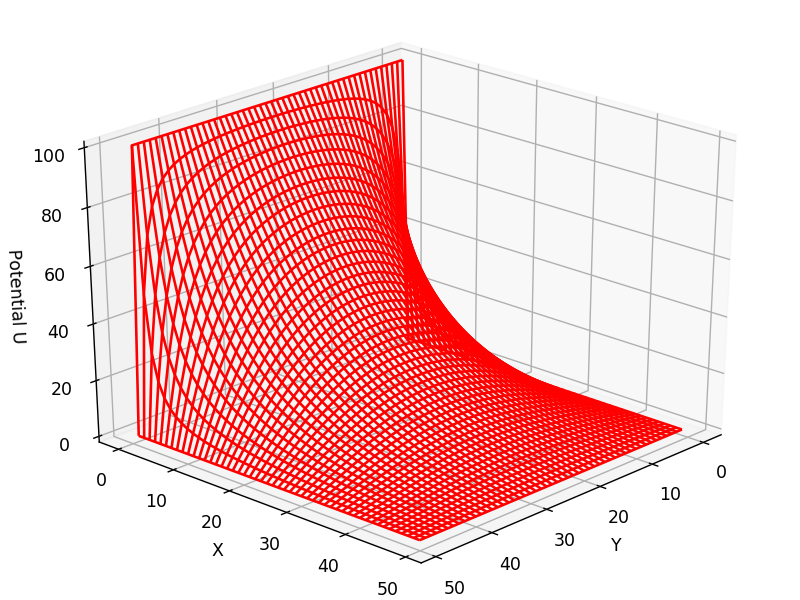

In [15]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 50
Niter = 1000
V = np.zeros((Nmax, Nmax))   

for k in range(0, Nmax-1): 
    V[k,0] = 100.0                              # fixed potential line at 100V
    
for iter in range(Niter):                       # iterations over algorithm
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

The behavior of the numerical solutions are qualitatively the same even when the step-size $h$ is modified.

### Part c:

Modify the program so that the iterations stop once the solution has converged. How does the number of iteration reuired change with the tolerance?

tolerance = 1
itterations= 23


<IPython.core.display.Javascript object>


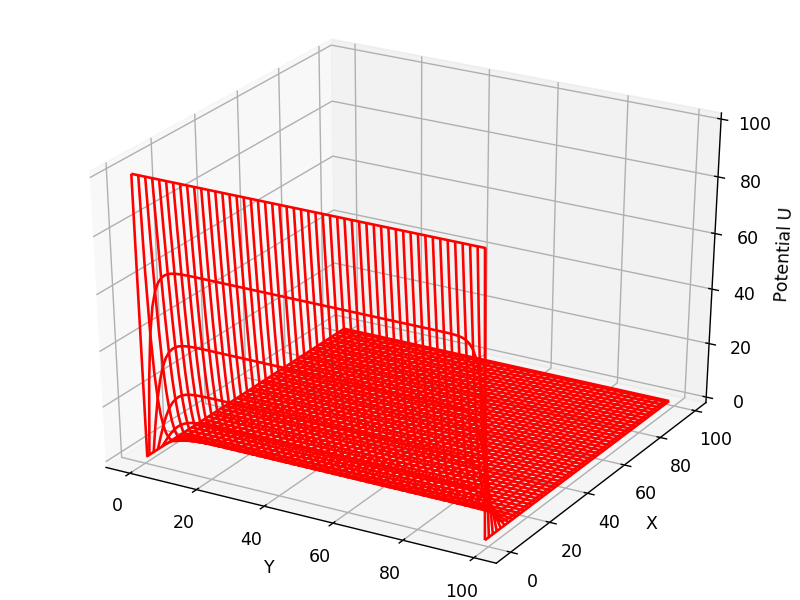

In [96]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
V = np.zeros((Nmax, Nmax))
V_err = 2*np.ones((Nmax, Nmax))

for k in range(0, Nmax-1): 
    V[k,0] = 100.0  # fixed potential line at 100V

tolerance = 0.1*np.ones((Nmax, Nmax))
itterations = 0
tol = 1

V_old = np.copy(V)
V_new = np.copy(V)

while np.any(V_err > tol):
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V_new[i,j] = 0.25*(V_new[i+1,j]+V_new[i-1,j]+V_new[i,j+1]+V_new[i,j-1])
    V_err = np.fabs(V_old - V_new)
    V_old = np.copy(V_new)
    itterations += 1
print('tolerance =', tol)
print('itterations=', itterations)
V = V_new

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

tolerance = 0.1
itterations= 235


<IPython.core.display.Javascript object>


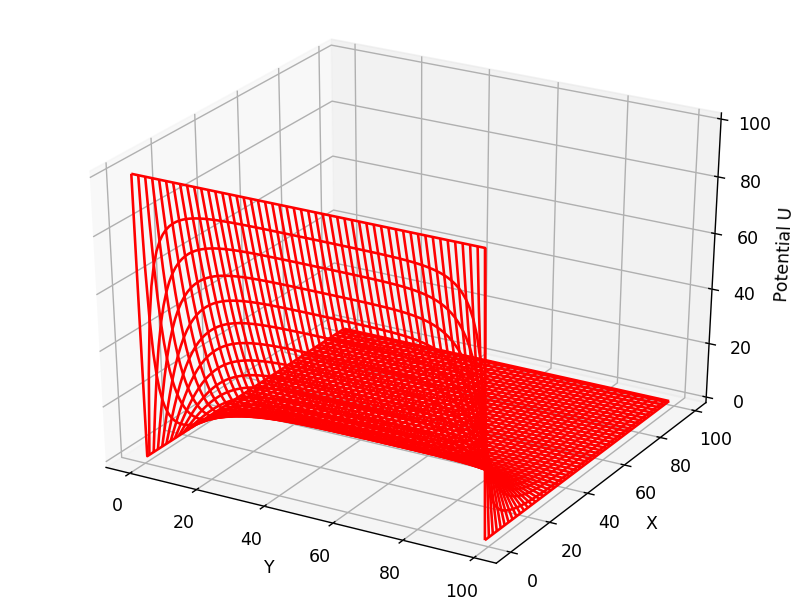

In [97]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
V = np.zeros((Nmax, Nmax))
V_err = 2*np.ones((Nmax, Nmax))

for k in range(0, Nmax-1): 
    V[k,0] = 100.0  # fixed potential line at 100V

tolerance = 0.1*np.ones((Nmax, Nmax))
itterations = 0
tol = 0.1

V_old = np.copy(V)
V_new = np.copy(V)

while np.any(V_err > tol):
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V_new[i,j] = 0.25*(V_new[i+1,j]+V_new[i-1,j]+V_new[i,j+1]+V_new[i,j-1])
    V_err = np.fabs(V_old - V_new)
    V_old = np.copy(V_new)
    itterations += 1
print('tolerance =', tol)
print('itterations=', itterations)
V = V_new

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

tolerance = 0.01
itterations= 1451


<IPython.core.display.Javascript object>


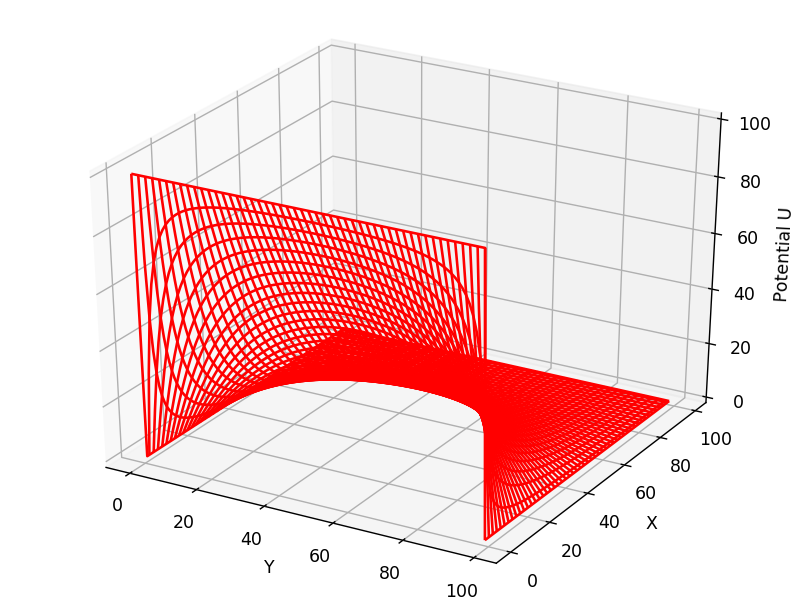

In [98]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
V = np.zeros((Nmax, Nmax))
V_err = 2*np.ones((Nmax, Nmax))

for k in range(0, Nmax-1): 
    V[k,0] = 100.0  # fixed potential line at 100V

tolerance = 0.1*np.ones((Nmax, Nmax))
itterations = 0
tol = 0.01

V_old = np.copy(V)
V_new = np.copy(V)

while np.any(V_err > tol):
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V_new[i,j] = 0.25*(V_new[i+1,j]+V_new[i-1,j]+V_new[i,j+1]+V_new[i,j-1])
    V_err = np.fabs(V_old - V_new)
    V_old = np.copy(V_new)
    itterations += 1
print('tolerance =', tol)
print('itterations=', itterations)
V = V_new

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

The lower the tolerance, the more itterations required!

### Part d:

Implement hte successive over-relaxation technique to accelerate the convergence. What values of $\omega$ gives the fastest convergence?

tolerance = 0.01
itterations= 198


<IPython.core.display.Javascript object>


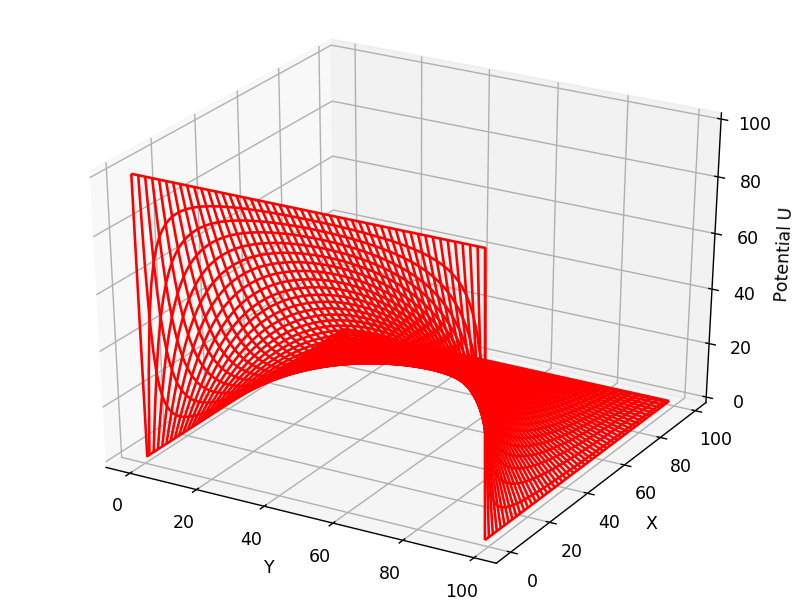

In [105]:
%matplotlib notebook
# LaplaceLine.py, Notebook Version

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Nmax = 100
V = np.zeros((Nmax, Nmax))
V_err = 2*np.ones((Nmax, Nmax))

for k in range(0, Nmax-1): 
    V[k,0] = 100.0  # fixed potential line at 100V

tolerance = 0.1*np.ones((Nmax, Nmax))
itterations = 0
tol = 0.01
omega = 1.9

V_old = np.copy(V)
V_new = np.copy(V)

while np.any(V_err > tol):
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): V_new[i,j] = omega*0.25*(V_new[i+1,j]+V_new[i-1,j]+V_new[i,j+1]+V_new[i,j-1]) + (1 - omega) * V_old[i,j]
    V_err = np.fabs(V_old - V_new)
    V_old = np.copy(V_new)
    itterations += 1
print('tolerance =', tol)
print('itterations=', itterations)
V = V_new

x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('Y')                              # label axes
ax.set_ylabel('X')
ax.set_zlabel('Potential U')
plt.show() 

Over-relaxation with $\omega = 1.9$ seems to be optimal!

### Part e:

Compare your nuerical result with the analytic result given in Eqn. 19.18:

$$ U(x,y) = \sum_{n = 1,3,5}^{\infty} \frac{400}{n \pi} \sin(\frac{n \pi x}{L}) \frac{\sinh(n \pi y / L)}{\sinh(n \pi)}$$

<IPython.core.display.Javascript object>


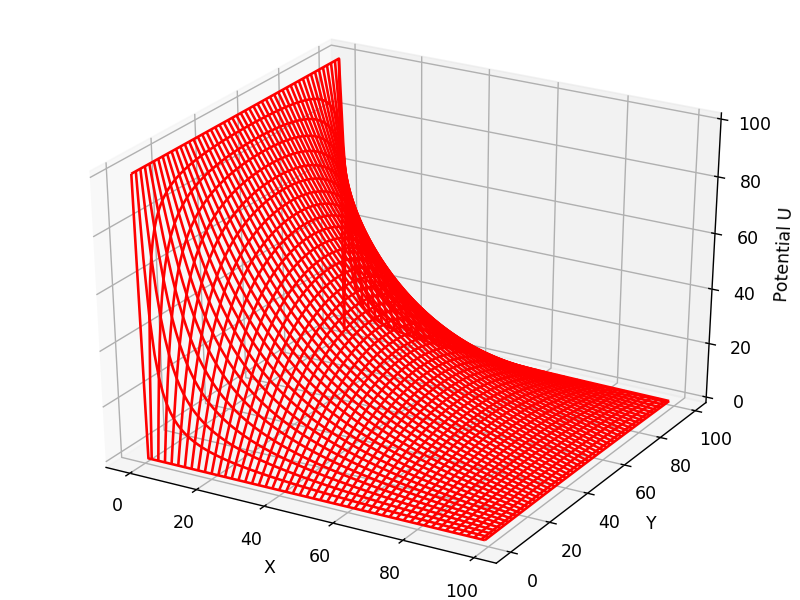

In [16]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

pi = np.pi

Nmax = 100
V = np.zeros((Nmax, Nmax))

for k in range(0, Nmax-1): 
    V[0,k] = 100.0  # fixed potential line at 100V

n_max = 200
    

for x in range(1, Nmax):                                                
    for y in range(1,Nmax):
        for n in range(1, n_max, 2):
            V[-y,x]+=(400/(n*pi))*np.sin((n*pi*x)/Nmax)*(np.sinh((n*pi*y)/Nmax)/np.sinh(n*pi))
            
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

def functz(V):                                  # Function returns V(x, y)
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')         # red wireframe
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show() 

The analytic and numerical solutions are visually identical!